# Finite Element 1D

In 1D:

\begin{equation*}
    u''(x)=f(x)
\end{equation*}

Then it's necessary construct a variational $v(x)$

\begin{equation*}
    -u''v=fv
\end{equation*}

Then integrating from $0$ to $1$ (Integration by parts):

\begin{equation*}
    \int_0^1 -(u''v)dx = -u'v\bigg\rvert_0^1+\int_0^1 u'v' dx = \int_0^1 u'v'dx
\end{equation*}

So the weak form is obtained:

\begin{equation*}
    \int_0^1 u'v'\;dx = \int_0^1 fv\;dx
\end{equation*}

Then an uniform cartesian mesh is generated where $x_i=ih$, $i=0,1,...,n$ and $h=\frac{1}{h}$, defining the intervals:

\begin{equation*}
    (x_{i-1},x_i)\;\;\;where\;\;\;i=1,2,...,n
\end{equation*}

### Representation:

Import libraries

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

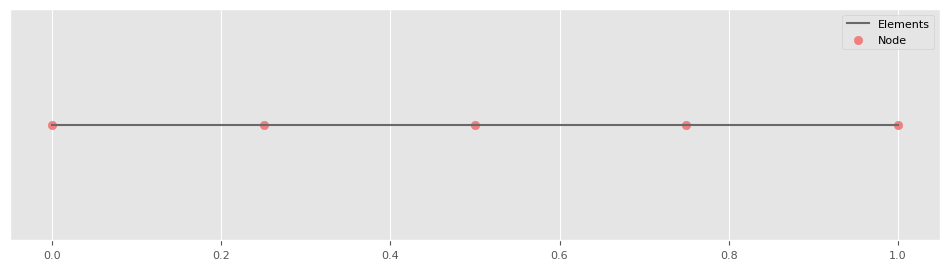

In [33]:
plt.figure(figsize=(12, 3))
x = np.linspace(0, 1, 1000)
ax = plt.axes()
ax.plot(np.array([0, 1/4., 1/2., 3/4., 1]), np.array([0, 0, 0, 0, 0]), label='Elements', color='dimgrey')
ax.scatter(np.array([0, 1/4., 1/2., 3/4., 1]), np.array([0, 0, 0, 0, 0]), label='Node', color='lightcoral')
ax.tick_params(labelsize=8)
ax.axes.get_yaxis().set_visible(False)
plt.legend(loc='best', fontsize=8)
plt.show()

Construct a set of basis functions based on the mesh, such as the piecewise linear functions $(i=1,2,...,n-1)$:

\begin{equation*}
    \phi_i(x) = 
        \begin{cases} 
        \frac{x-x_{i-1}}{h} & \text{si} \;\; x_{i-1} \leq x < x_i \\
        \frac{x_{i+1}-x}{h} & \text{si} \;\; x_i \leq x < x_{i+1} \\
        0 & \text{si} \;\; otherwise
    \end{cases}
\end{equation*}

Represent the approximate finite element solution by a linear combination.

\begin{equation*}
    u_h(x)=\sum_{j=1}^{n-1}c_j\phi_j(x)
\end{equation*}

Any such a finite element method is called conforming one. Different finite dimensional spaces generate different finite element solutions. Since $V_h$ has finite dimensions, we can find a set of basis functions:

\begin{equation*}
    \phi_1,\phi_2,...,\phi_{M-1}\subset V_h
\end{equation*}

That are linearly independent:

\begin{equation*}
    \sum_{j=1}^{M-1}\alpha_j\phi_j=0\;\;\;;\;\;\alpha_1=\alpha_0=...=\alpha_{M-1}=0
\end{equation*}

Thus $V_h$ is the space spanned by the basis functions.

\begin{equation*}
    V_h=\left\{v_h(x),v_h(x)=\sum_{j-1}^{M-1}\alpha_j \phi_j \right\}
\end{equation*}

The simplest finite dimensional space is the piecewise continuous linear function space defined over the mesh.

\begin{equation*}
    V_h=\{v_h(x),\;\;\; v_h(x)\;is\;continuous\;piecewise\;linear,\;v_h(0)=v_h(1)=0\}
\end{equation*}

$V_h$ has a finite dimension, even though there are a infinite number of elements.

Then it's necessary to find the dimensions of $V_h$. A linear function $l(x)$ in an interval $(x_i,x_{i+1})$ is uniquely determined by it's values at $x_i$ and $x_{i+1}$.

\begin{equation*}
    l(x)=l(x_i)=\frac{x-x_{i+1}}{x_i-x_{i+1}}+l(x_{i+1})\frac{x-x_i}{x_{i+1}-x_i}
\end{equation*}

There are $M-1$ nodes $l(x_i)$. $l(x_1),l(x_2),...,l(x_\{M-1\})$ for a piecewise continuous linear function over the mesh in addition to $l(x_0)=l(x_M)=0$. Given a vector $[l(x_1),l(x_2),...,l(x_{m-1})]^T \in \mathbb{R}^{M-1}$, we can construct a $v_h(x)\in V_h$ by taking $v_h(x_i)=l(x_i),\;\;i=1,...,M-1$. On the other hand, given $v_h(x)\in V_h$ we get a vector $[v(x_1),v(x_2),...,v(x_{M-1})]^T \in \mathbb{R}^{M-1}$. Thus there is a one to one relation between $V_h$ and $\mathbb{R}^{M-1}$, so $V_h$ has the finite dimension $M-1$. $V_h$ is considered to be equivalent to $\mathbb{R}^{M-1}$.

If $\phi_i$ are the hat functions.

\begin{equation*}
    \begin{bmatrix*}
    \frac{2}{h}&\frac{-1}{h} \\
    \frac{-1}{h}&\frac{2}{h}&\frac{-1}{h}\\
    &\frac{-1}{h}&\frac{2}{h}&\frac{-1}{h}\\
    &\ddots&\ddots&\ddots\\
    &&&\frac{-1}{h}&\frac{2}{h}&\frac{-1}{h}\\
    &&&&\frac{-1}{h}&\frac{2}{h}
  \end{bmatrix*}
  \begin{bmatrix*}
    c_1\\
    c_2\\
    c_3\\
    \vdots\\
    c_{n-2}\\
    c_{n-1}
  \end{bmatrix*}=
  \begin{bmatrix*}
    \int_0^1 f\phi_1 dx\\
    \int_0^1 f\phi_2 dx\\
    \int_0^1 f\phi_3 dx\\
    \vdots\\
    \int_0^1 f\phi_{n-2} dx\\
    \int_0^1 f\phi_{n-1} dx\\
  \end{bmatrix*}
\end{equation*}

Then solve the linear system of equations for the coefficients and hence obtain the approximate solution $u_h(x)=\sum_i c_i\phi_i (x)$.

### Mesh Representation

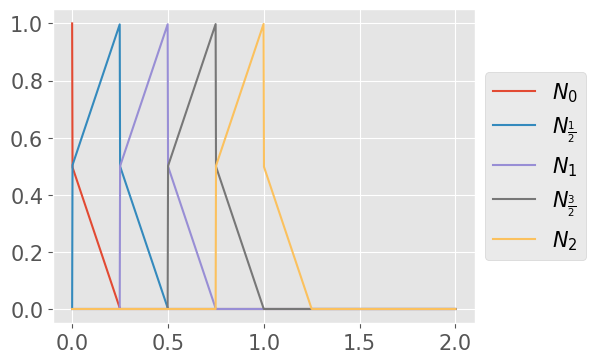

In [48]:
def Phi(x, i):
    """Function for representation purposes."""
    if i == 0:
        return 1 - 2 * x if 0 <= x < 0.5 else 0
    elif i == 2:
        return 2 * (x - 3/2) if 3/2 < x <= 2 else 0
    else:
        if i - 1/2 <= x < i:
            return 2 * (x - (i - 1/2))
        elif i <= x < i + 1/2:
            return 1 - 2 * (x - i)
        else:
            return 0

def Phi_h(x,i):
    """Constructor Function for representation."""
    Phi_F=[]
    for j in x:
        Phi_F.append(Phi(i,j))

    return np.asarray(Phi_F)

ax=plt.axes()
ax.tick_params(labelsize=15)

ax.plot(x,Phi_h(x,0), label=r'$Phi_{0}$')
ax.plot(x,Phi_h(x,1/2.), label=r'$Phi_{\frac{1}{4}}$')
ax.plot(x,Phi_h(x,1), label=r'$Phi_{\frac{1}{2}}$')
ax.plot(x,Phi_h(x,3/2.), label=r'$Phi_{\frac{3}{4}}$')
ax.plot(x,Phi_h(x,2), label=r'$Phi_{1}$')
ax.tick_params(labelsize=15)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.85, box.height* 0.85])
plt.legend(loc='center left', prop={'size':15}, bbox_to_anchor=(1, 0.5))
plt.show()

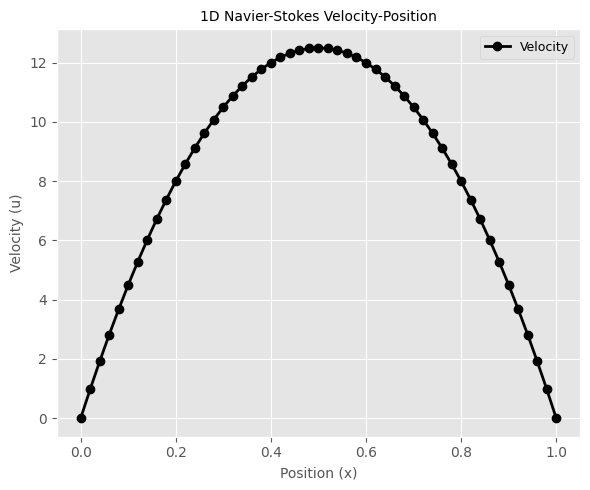

In [5]:
# Parameters
number_of_elements = 50  # number of elements
L = 1  # length of domain
nu = 0.01  # viscosity
f = 1.0  # force
u0 = 0  # BC at x=0
uL = 0  # BC at x=L
dx = L / number_of_elements  # size of each element

# Initialize matrices
K = np.zeros((number_of_elements+1, number_of_elements+1))
F = np.zeros(number_of_elements+1)

# Assembly
for i in range(number_of_elements):
    k_local = np.array(
        [
            [nu/dx - 0.5*(u0 + uL)/2, -nu/dx + 0.5*(u0 + uL)/2],
            [-nu/dx - 0.5*(u0 + uL)/2, nu/dx + 0.5*(u0 + uL)/2],
        ],
    )
    # Local load vector
    f_local = np.array([f*dx/2, f*dx/2])
    
    # Assembly to global matrix
    K[i:i+2, i:i+2] += k_local
    F[i:i+2] += f_local

# Apply Dirichlet boundary conditions
K[0, :] = 0
K[:, 0] = 0
K[0, 0] = 1
F[0] = u0

K[-1, :] = 0
K[:, -1] = 0
K[-1, -1] = 1
F[-1] = uL

# Solve
u = np.linalg.solve(K, F)
x = np.linspace(0, L, number_of_elements+1)

# Plot
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(6, 5))
ax.plot(x, u, '-o', label="Velocity", linewidth=2, markersize=6, color="k")
ax.set_xlabel("Position (x)", fontsize=10)
ax.set_ylabel("Velocity (u)", fontsize=10)
ax.set_title("1D Navier-Stokes Velocity-Position", fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.grid(True)
ax.legend(fontsize=9)
plt.tight_layout()
plt.show()
